<a href="https://colab.research.google.com/github/Kanishkaigu/Studentmarksprediction/blob/main/Student_Mark_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
upload=files.upload()

Saving student_info.csv to student_info.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

#Loading the Dataset
df=pd.read_csv("student_info.csv")
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [6]:
#showing first five rows
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
#showing first five rows
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [8]:
df.shape

(200, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [10]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


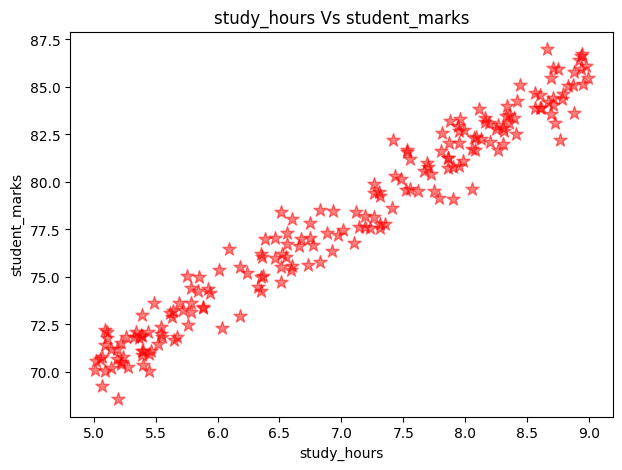

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(x=df.study_hours,y=df.student_marks,color="red",marker="*",s=100,alpha=0.5)
plt.xlabel("study_hours")
plt.ylabel("student_marks")
plt.title("study_hours Vs student_marks")
plt.show()

In [12]:

#Data Cleaning
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [13]:
df.isnull().sum()

,0
study_hours,5
student_marks,0


In [14]:
df.mean()

,0
study_hours,6.995949
student_marks,77.933750


In [15]:
df2=df.fillna(df.mean())

In [16]:
df2.isnull().sum()

,0
study_hours,0
student_marks,0


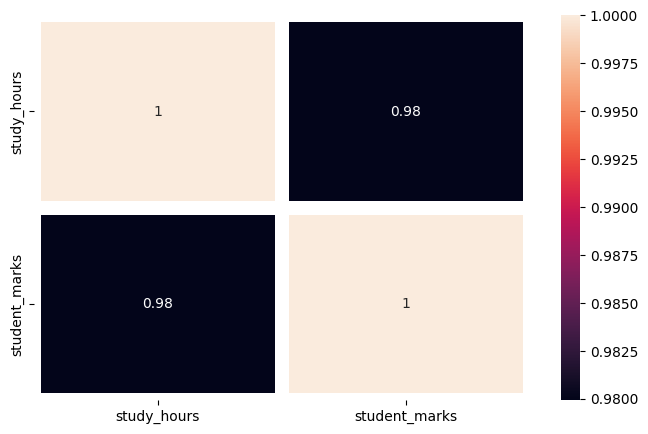

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,linewidths=10)
plt.show()

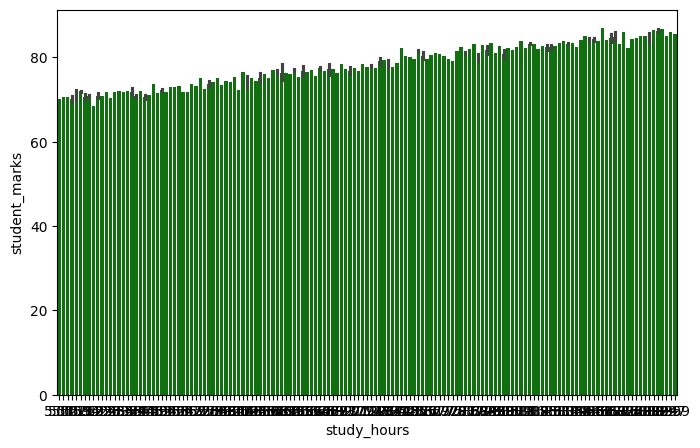

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x="study_hours",y="student_marks",data=df2, color="green")
plt.show()

In [19]:
#split dataset
#matrix = X = Independent Variable = student_hours
#vector = y = Dependent Variable = student_marks

X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")
print("shape of X =",X.shape)
print("shape of y =",y.shape)

shape of X = (200, 1)
shape of y = (200, 1)


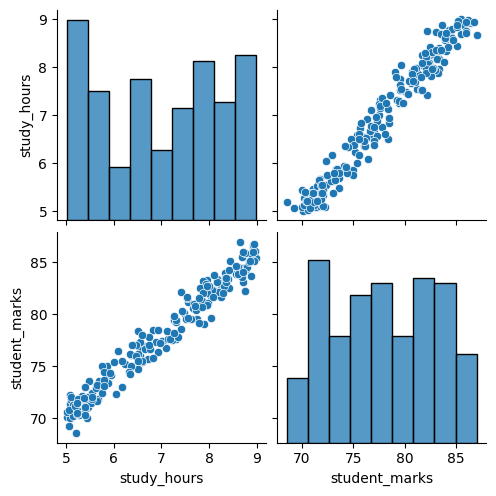

In [20]:
sns.pairplot(df)

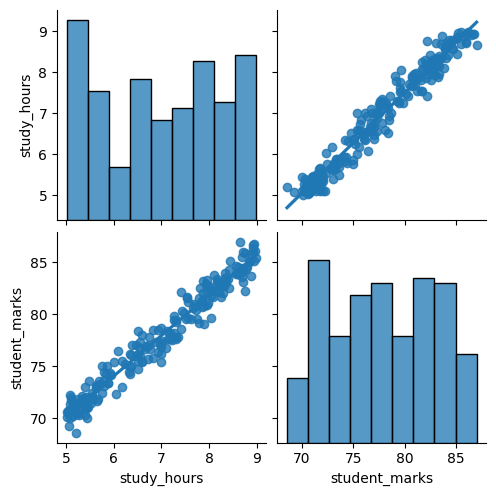

In [21]:
sns.pairplot(df2,kind="reg")

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=51) # taking 20% data for test. 20% is randomly
print("shape of X_train =",X_train.shape)
print("shape of y_train =",y_train.shape)
print("shape of X_test =",X_test.shape)
print("shape of y_test =",y_test.shape)

shape of X_train = (160, 1)
shape of y_train = (160, 1)
shape of X_test = (40, 1)
shape of y_test = (40, 1)


In [23]:
#Selecting a model and train it
#Linear Regression
# y=m*x+c
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
#value of m
lr.coef_

array([[3.93571802]])

In [26]:
#value of c
lr.intercept_

array([50.44735504])

In [27]:
#subsyituting the value of m and c in the formula
# y = m * x + c

m= 3.93571802
c= 50.44735504

y= m * 5 + c
y

70.12594514

In [28]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [29]:
#Creating a DataFrame for easy analysis
#concatenating the test and pred value.
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original Percentage","student_marks_predicted Percentage"])

,study_hours,student_marks_original Percentage,student_marks_predicted Percentage
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [30]:
#Checking the Accuracy of our Model. Fine-tune our Model
lr.score(X_test,y_test)                  #Getting 95% Accuracy

0.9514124242154466

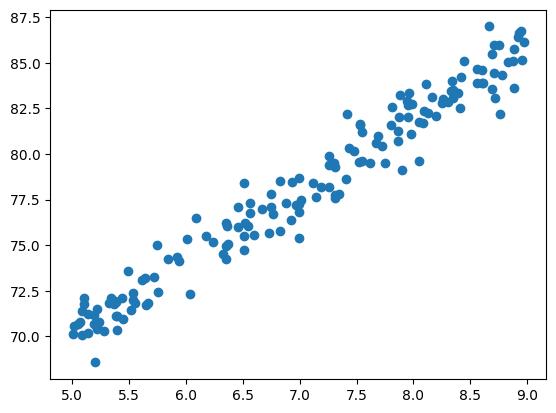

In [31]:
plt.scatter(X_train,y_train)

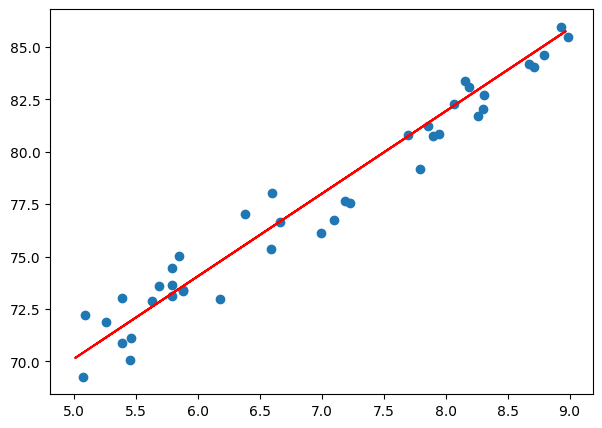

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

In [33]:
#savung our machine learning model
import joblib
joblib.dump(lr, "Student_mark_prediction_model.pkl")

['Student_mark_prediction_model.pkl']

In [34]:
model = joblib.load("Student_mark_prediction_model.pkl")

In [35]:
model.predict([[4]])[0][0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.19022710353573)